In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from google.colab import drive 

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
dataframe1 = pd.read_csv('/content/drive/My Drive/heart_failure_prediction/heart_failure_clinical_records_dataset.csv')
dataframe1

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]

In [4]:
dataframe1.describe()

age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]

In [5]:
dataframe1.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
dataframe1.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
dataframe1.corr(method = 'pearson')

age   anaemia  ...      time  DEATH_EVENT
age                       1.000000  0.088006  ... -0.224068     0.253729
anaemia                   0.088006  1.000000  ... -0.141414     0.066270
creatinine_phosphokinase -0.081584 -0.190741  ... -0.009346     0.062728
diabetes                 -0.101012 -0.012729  ...  0.033726    -0.001943
ejection_fraction         0.060098  0.031557  ...  0.041729    -0.268603
high_blood_pressure       0.093289  0.038182  ... -0.196439     0.079351
platelets                -0.052354 -0.043786  ...  0.010514    -0.049139
serum_creatinine          0.159187  0.052174  ... -0.149315     0.294278
serum_sodium             -0.045966  0.041882  ...  0.087640    -0.195204
sex                       0.065430 -0.094769  ... -0.015608    -0.004316
smoking                   0.018668 -0.107290  ... -0.022839    -0.012623
time                     -0.224068 -0.141414  ...  1.000000    -0.526964
DEATH_EVENT               0.253729  0.066270  ... -0.526964     1.000000

[13 rows x 13 columns]

In [8]:
dataframe1.shape

(299, 13)

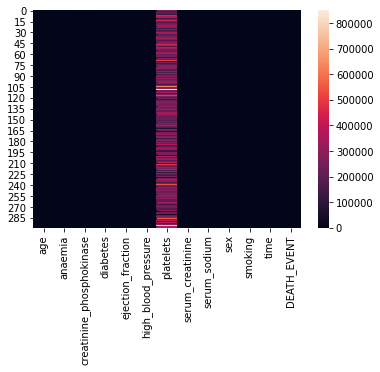

In [9]:
sns.heatmap(data = dataframe1)

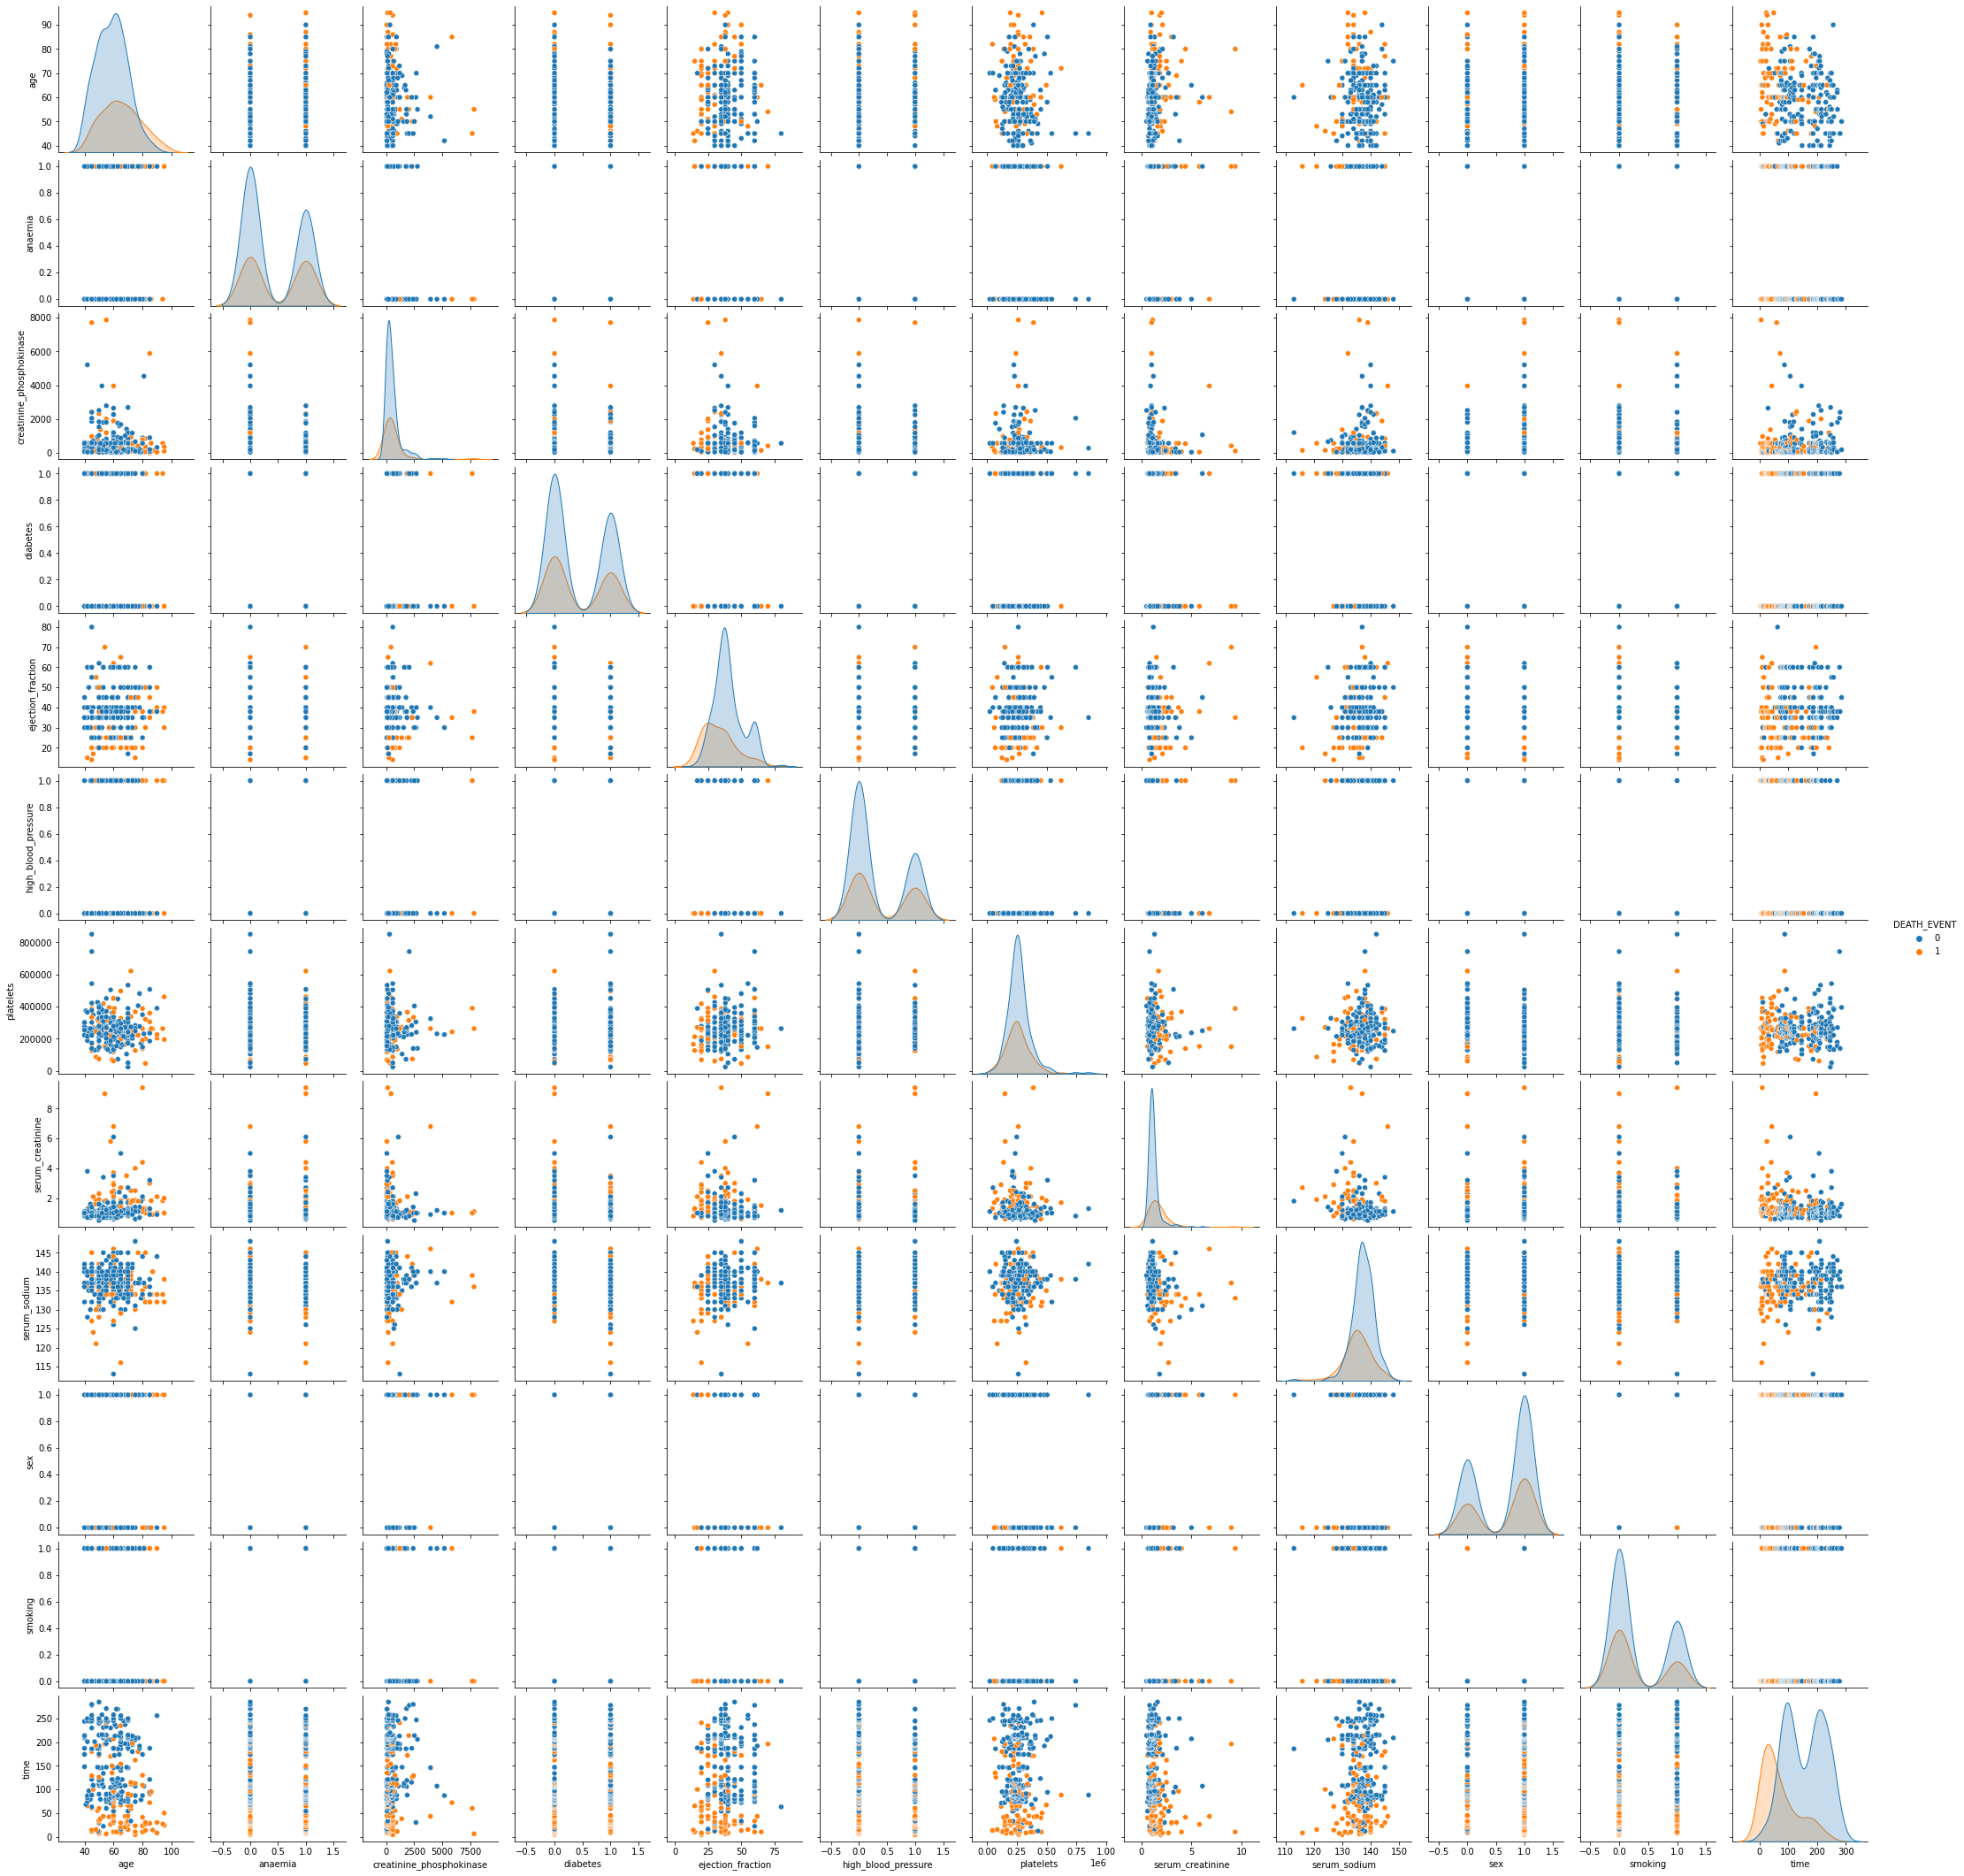

In [10]:
sns.pairplot(data = dataframe1, hue = 'DEATH_EVENT')

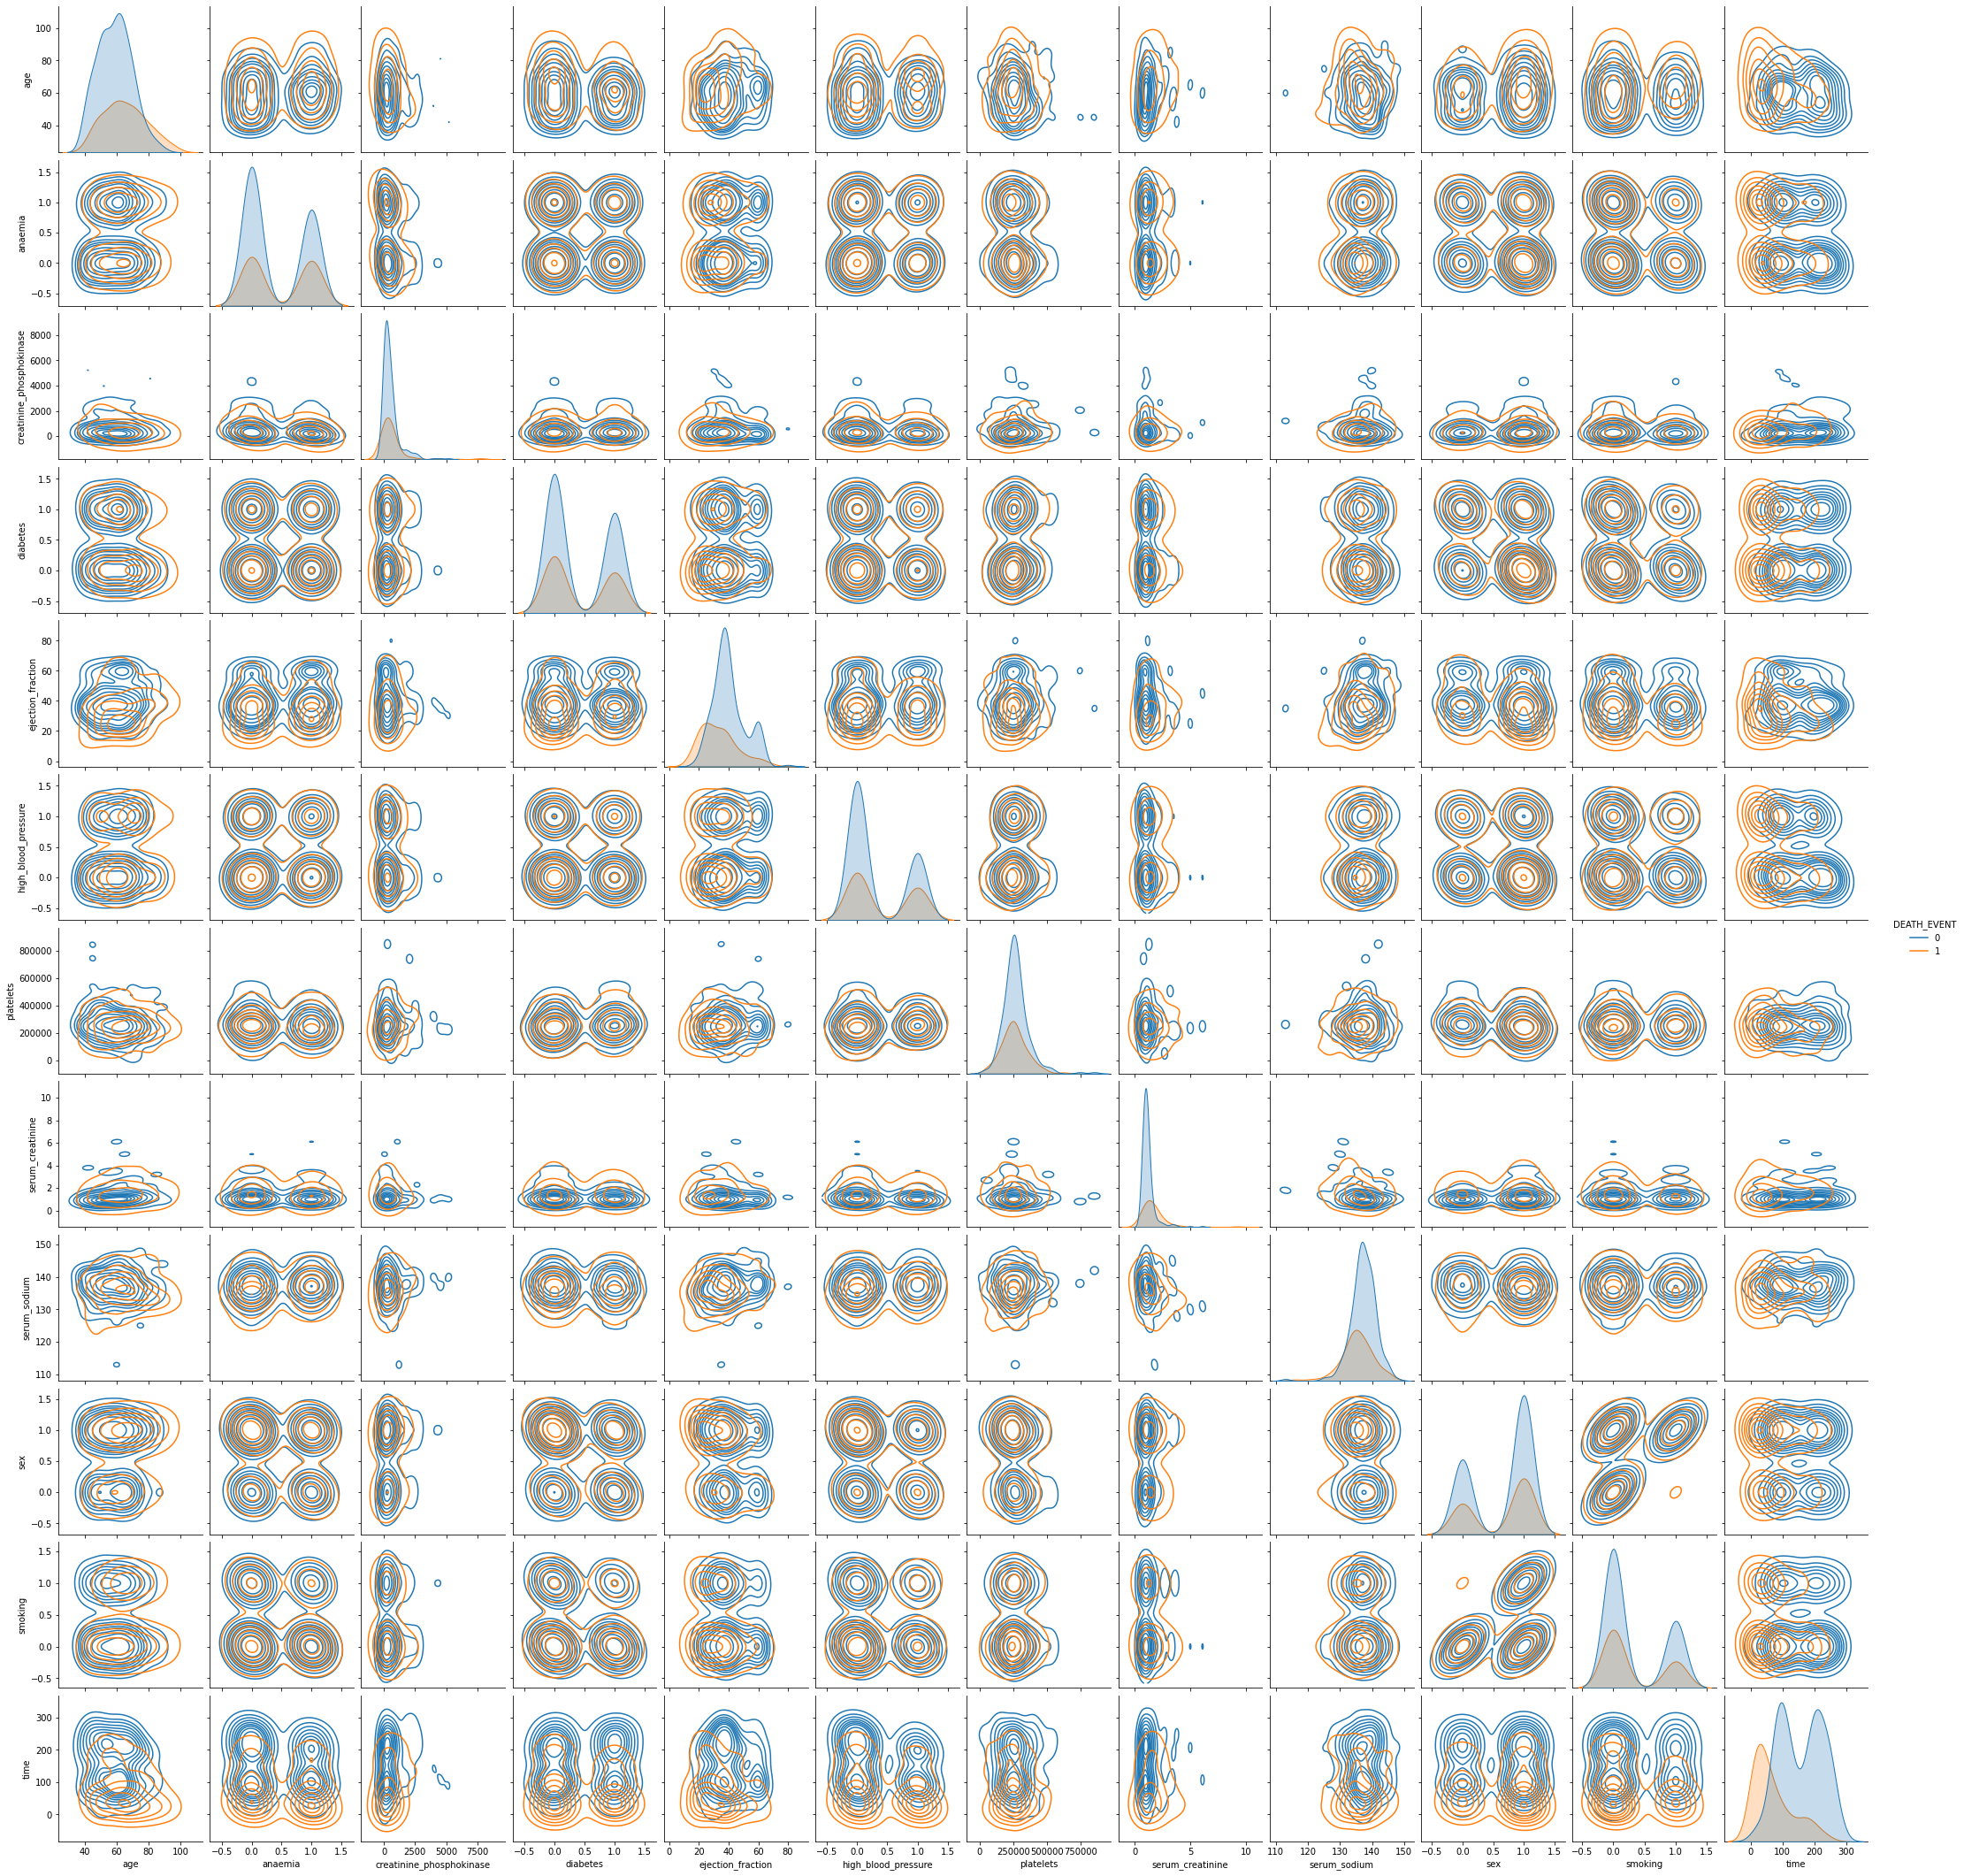

In [11]:
sns.pairplot(data = dataframe1, kind = 'kde', hue = 'DEATH_EVENT')

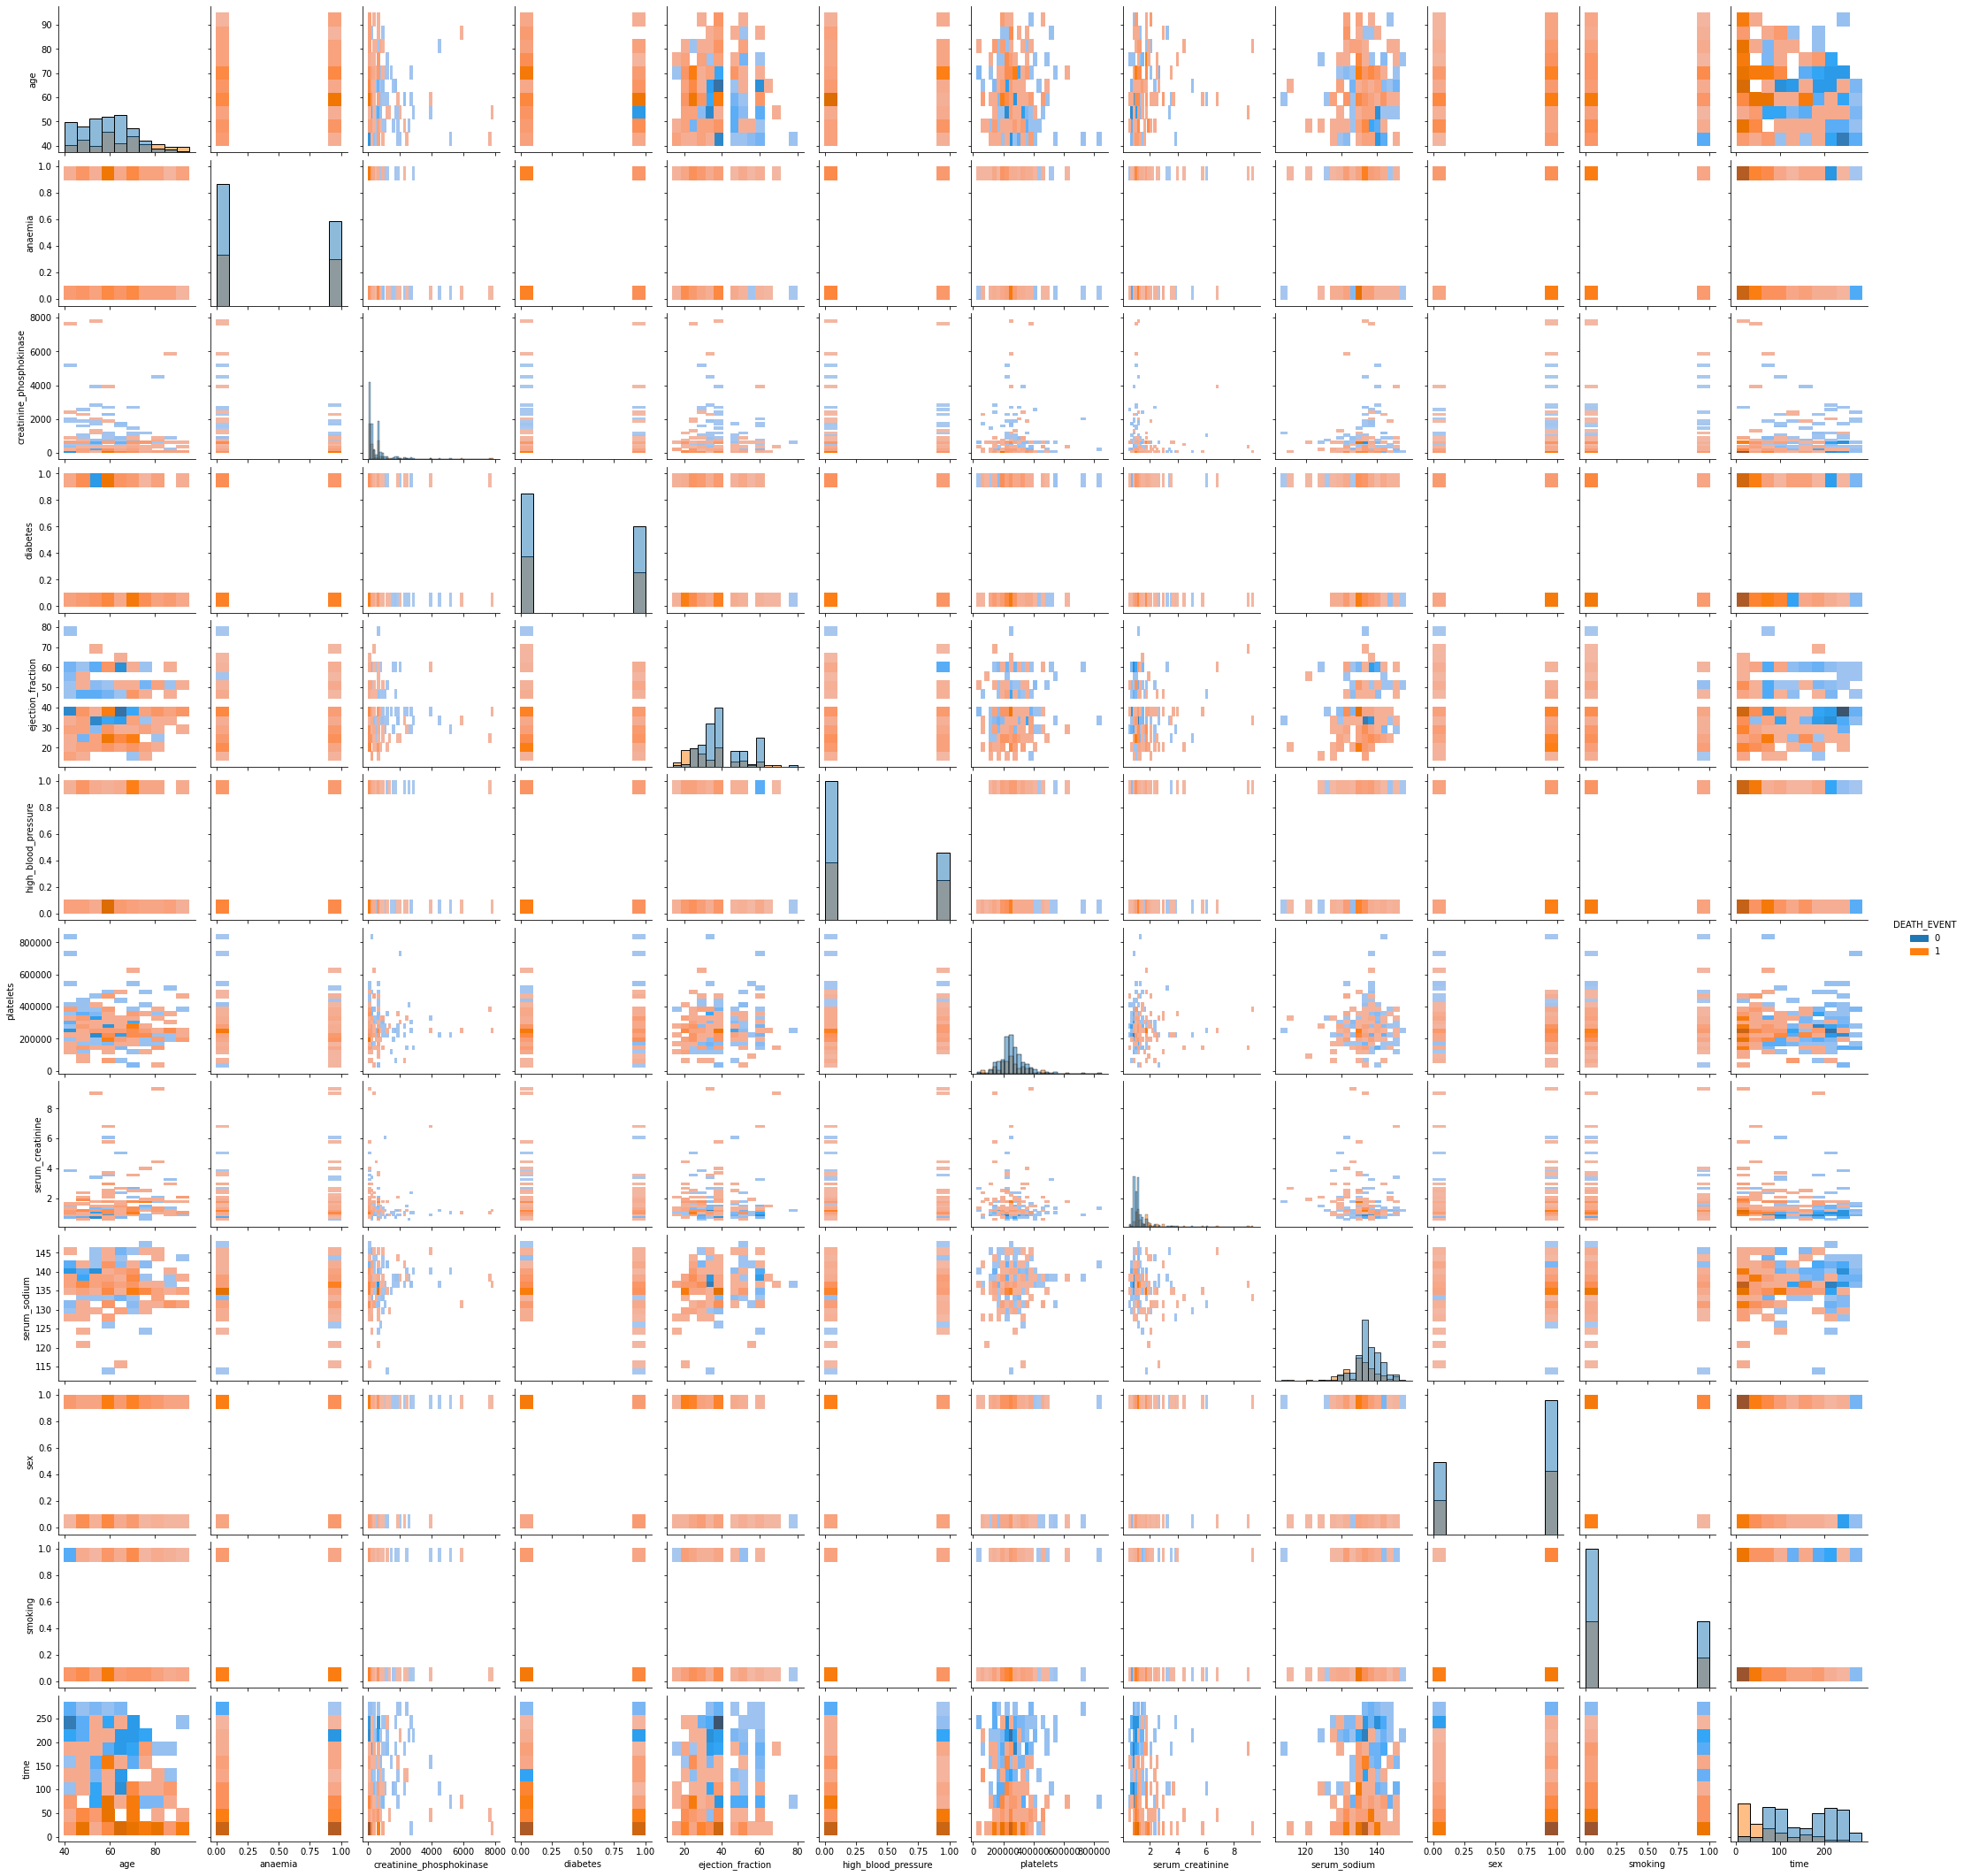

In [12]:
sns.pairplot(data = dataframe1, kind = 'hist', hue = 'DEATH_EVENT')

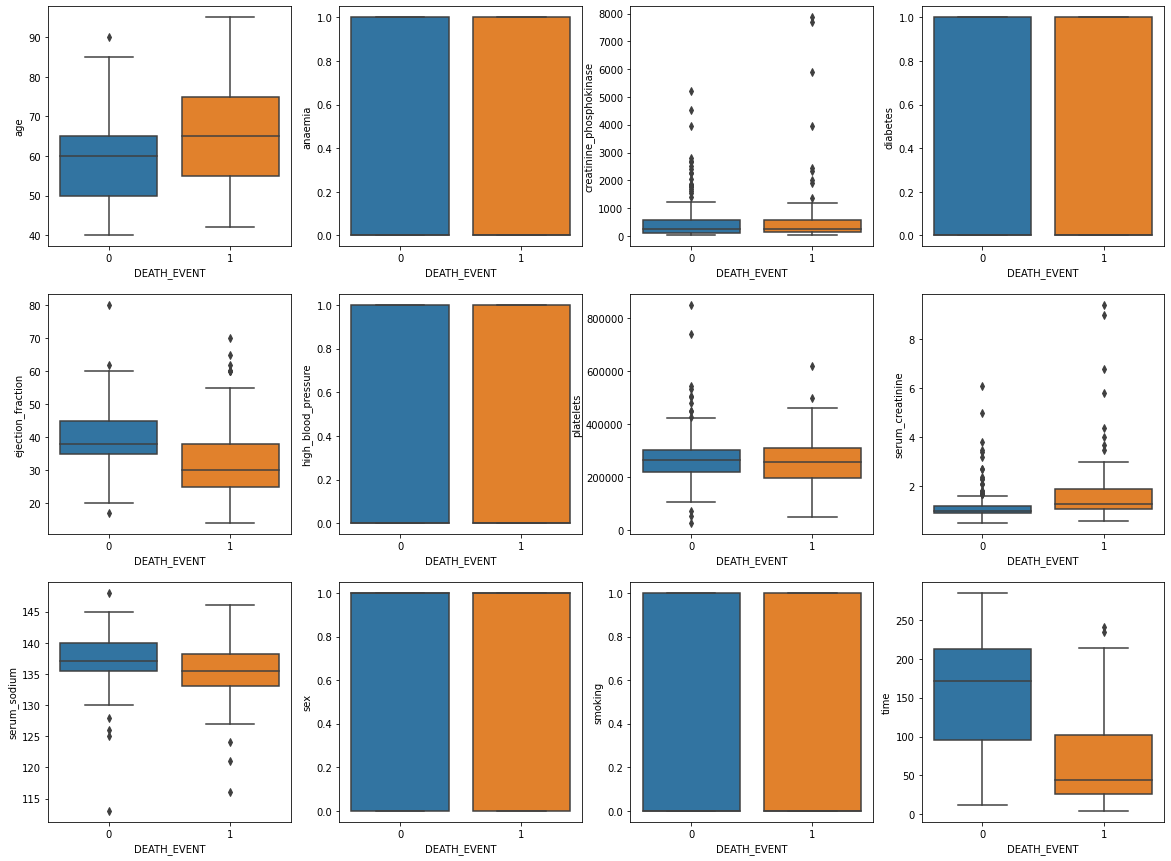

In [13]:
## To detect the outliers
_,ax = plt.subplots(3,4, figsize = (20,15))
ax = ax.flatten()
for i in range(0, dataframe1.shape[1]-1): 
  sns.boxplot(x=dataframe1['DEATH_EVENT'], 
              y= dataframe1.iloc[:, i],
              ax = ax[i])

Text(0.5, 1.0, 'Amount of Heart Failure')

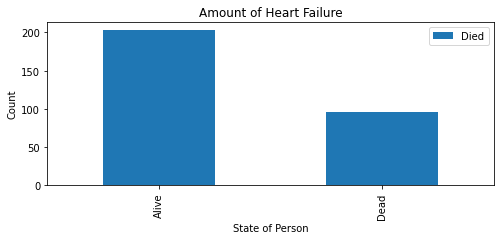

In [14]:
dataframe1.rename(columns = {'DEATH_EVENT': 'Died'}, inplace = True)
dataframe1.Died.value_counts().plot(kind = 'bar', 
                                    figsize = (8,3), 
                                    legend = True,
                                    xlabel = 'State of Person',
                                    ylabel = 'Count')
labels1 = ['Alive', 'Dead']
plt.xticks([0,1],labels1, rotation='vertical' )
plt.title(('Amount of Heart Failure'))

### Creating continous and categorical columns in seperate manner

In [15]:
continous_columns = ['age', 'creatinine_phosphokinase','ejection_fraction',
                     'platelets','serum_creatinine','serum_sodium']
categorical_columns = list(dataframe1.columns.drop(continous_columns))
categorical_columns.remove('time')
categorical_columns.remove('Died')

### Visualization of the continous variable

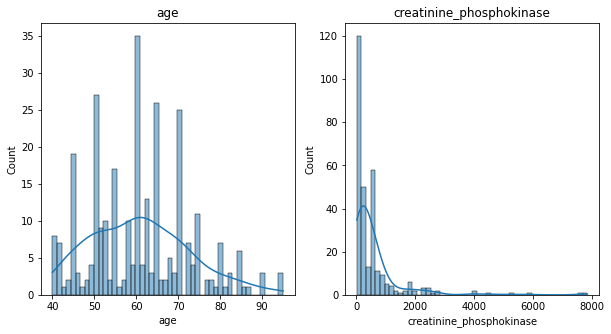

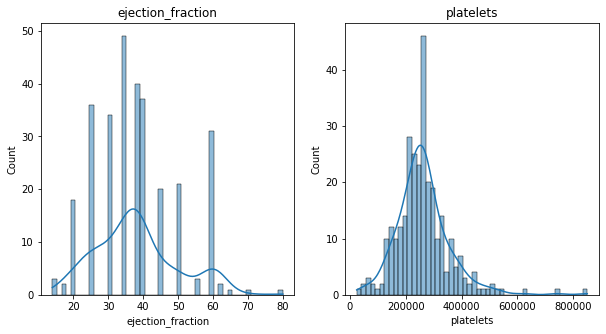

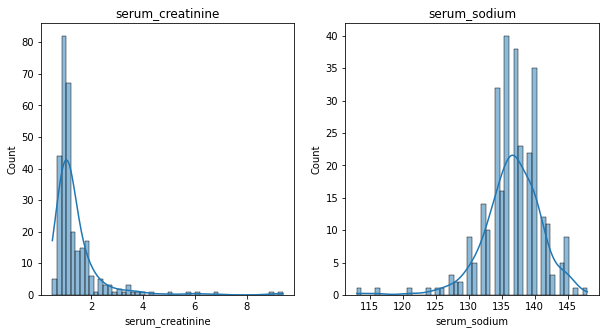

In [16]:
counter = 0
max_in_row = 2

for x in continous_columns:
  data = dataframe1[x]
  plt.figure(counter//max_in_row,figsize = (10,5))
  plt.subplot(1, max_in_row ,(counter)%max_in_row + 1 )
  plt.title(x)
  sns.histplot(data=data, 
               bins = 50, 
               kde = 50)
  counter = counter + 1

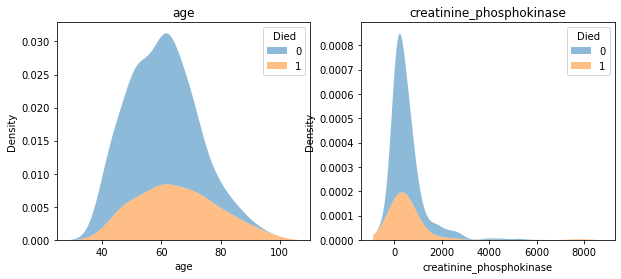

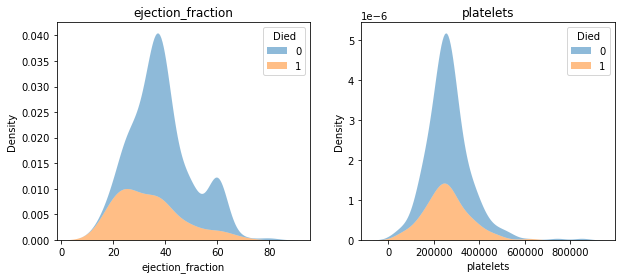

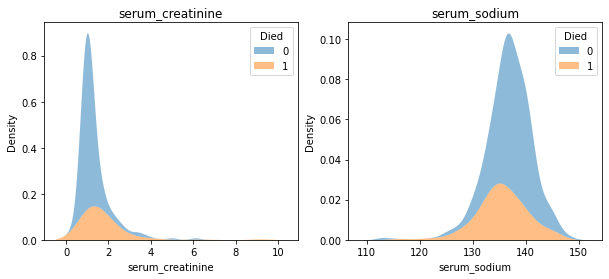

In [17]:
counter = 0
max_in_row = 2
for x in continous_columns: 
  data = dataframe1[x]
  plt.figure(counter//max_in_row,figsize = (10,4))
  plt.subplot(1, max_in_row, (counter)%max_in_row + 1)
  plt.title(x)
  sns.kdeplot(x = x,
              hue = 'Died',
              data = dataframe1, 
              fill = True, 
              common_norm = 1, 
              multiple = 'stack',
              alpha = 0.5,
              linewidth=0)
  counter += 1

### Percentage of Men and Woman who lived and died from heart failure

Text(0.5, 1.0, 'Male and Female Survival Rate')

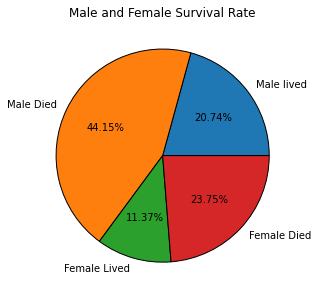

In [18]:
male = dataframe1[dataframe1.sex == 1]
female = dataframe1[dataframe1.sex == 0 ]

male_lived = male[male.Died == 1]
male_died = male[male.Died == 0]
female_lived = female[female.Died == 1]
female_died = female[female.Died == 0]

data = [len(male_lived), len(male_died), len(female_lived), len(female_died)]
plt.pie(x=data,
        labels = ['Male lived','Male Died', 'Female Lived', 'Female Died'],
        autopct = '%.2f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Male and Female Survival Rate')

### Percentage of Men and Women who lived and died from heart failure having diabetes

Text(0.5, 1.0, 'Diabetes Survival Rate')

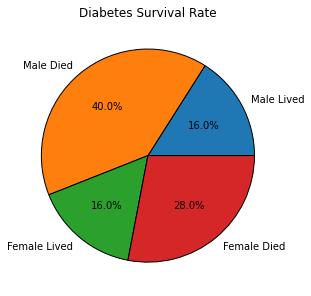

In [19]:
male_lived_diabetes = male_lived[male_lived.diabetes == 1]
male_died_diabetes = male_died[male_died.diabetes == 1]
female_lived_diabetes = female_lived[female_lived.diabetes == 1]
female_died_diabetes = female_died[female_died.diabetes == 1]
data = [len(male_lived_diabetes), len(male_died_diabetes), len(female_lived_diabetes), len(female_died_diabetes)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Diabetes Survival Rate')

Text(0.5, 1.0, 'Non-Diabetes Survival Rate')

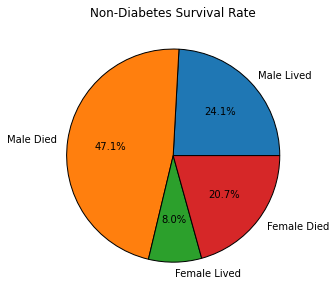

In [20]:
male_lived_non_diabetes = male_lived[male_lived.diabetes ==0]
male_died_non_diabetes = male_died[male_died.diabetes ==0]
female_lived_non_diabetes = female_lived[female_lived.diabetes ==0]
female_died_non_diabetes = female_died[female_died.diabetes ==0]
data = [len(male_lived_non_diabetes), len(male_died_non_diabetes), len(female_lived_non_diabetes), len(female_died_non_diabetes)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Non-Diabetes Survival Rate')

### Percentage of Survival Rate amoungst men and women who are anaemic

Text(0.5, 1.0, 'Anaemia Survival Rate')

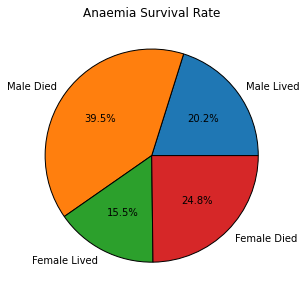

In [21]:
male_lived_anaemia = male_lived[male_lived.anaemia == 1]
male_died_anaemia = male_died[male_died.anaemia == 1]
female_lived_anaemia = female_lived[female_lived.anaemia == 1]
female_died_anaemia = female_died[female_died.anaemia == 1]
data = [len(male_lived_anaemia), len(male_died_anaemia), len(female_lived_anaemia), len(female_died_anaemia)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Anaemia Survival Rate')

Text(0.5, 1.0, 'Non-Anaemia Survival Rate')

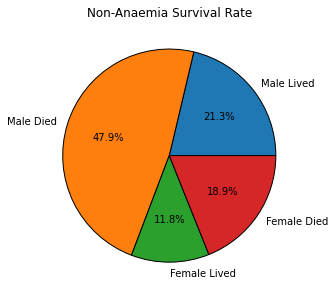

In [22]:
male_lived_non_anaemia = male_lived[male_lived.anaemia == 0]
male_died_non_anaemia = male_died[male_died.anaemia == 0]
female_lived_non_anaemia = female_lived[female_lived.anaemia == 0]
female_died_non_anaemia = female_died[female_died.anaemia == 0]
data = [len(male_lived_non_anaemia), len(male_died_non_anaemia), len(female_lived_anaemia), len(female_died_anaemia)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Non-Anaemia Survival Rate')

### Percentage of Survival Rate amoung men and women who have high blood pressure


Text(0.5, 1.0, 'Non-Anaemia Survival Rate')

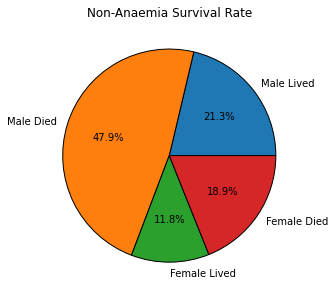

In [23]:
male_lived_hbp = male_lived[male_lived.high_blood_pressure == 1]
male_died_hbp = male_died[male_died.high_blood_pressure == 1]
female_lived_hbp = female_lived[female_lived.high_blood_pressure == 1]
female_died_hbp = female_died[female_died.high_blood_pressure == 1]
data = [len(male_lived_hbp), len(male_died_hbp), len(female_lived_hbp), len(female_died_hbp)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('High Blood Pressure Survival Rate')

Text(0.5, 1.0, 'Non - High Blood Pressure Survival Rate')

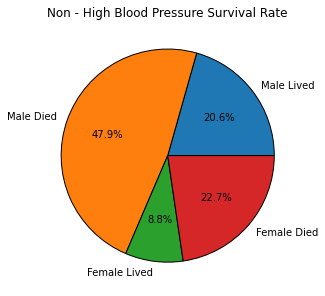

In [24]:
male_lived_non_hbp = male_lived[male_lived.high_blood_pressure == 0]
male_died_non_hbp = male_died[male_died.high_blood_pressure == 0]
female_lived_non_hbp = female_lived[female_lived.high_blood_pressure == 0]
female_died_non_hbp = female_died[female_died.high_blood_pressure == 0]
data = [len(male_lived_non_hbp), len(male_died_non_hbp), len(female_lived_non_hbp), len(female_died_non_hbp)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Non - High Blood Pressure Survival Rate')

### Percentage of Survival Rate amoung men and women who have Smoking Habit

Text(0.5, 1.0, 'Smoking Survival Rate')

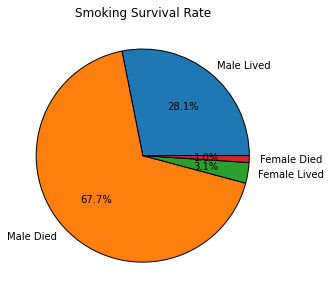

In [25]:
male_lived_smoke = male_lived[male_lived.smoking == 1]
male_died_smoke = male_died[male_died.smoking == 1]
female_lived_smoke = female_lived[female_lived.smoking == 1]
female_died_smoke = female_died[female_died.smoking == 1]
data = [len(male_lived_smoke), len(male_died_smoke), len(female_lived_smoke), len(female_died_smoke)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Smoking Survival Rate')

Text(0.5, 1.0, 'Non-Smoking Survival Rate')

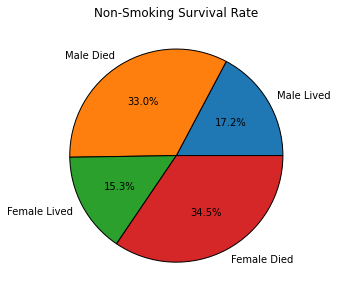

In [26]:
male_lived_non_smoke = male_lived[male_lived.smoking == 0]
male_died_non_smoke = male_died[male_died.smoking == 0]
female_lived_non_smoke = female_lived[female_lived.smoking == 0]
female_died_non_smoke = female_died[female_died.smoking == 0]
data = [len(male_lived_non_smoke), len(male_died_non_smoke), len(female_lived_non_smoke), len(female_died_non_smoke)]
plt.pie(x = data, labels = ['Male Lived', 'Male Died', 'Female Lived', 'Female Died'], 
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor': 'black'})
plt.tight_layout()
plt.title('Non-Smoking Survival Rate')

### Visualization of  Categorical Variables with their probabilllity densities

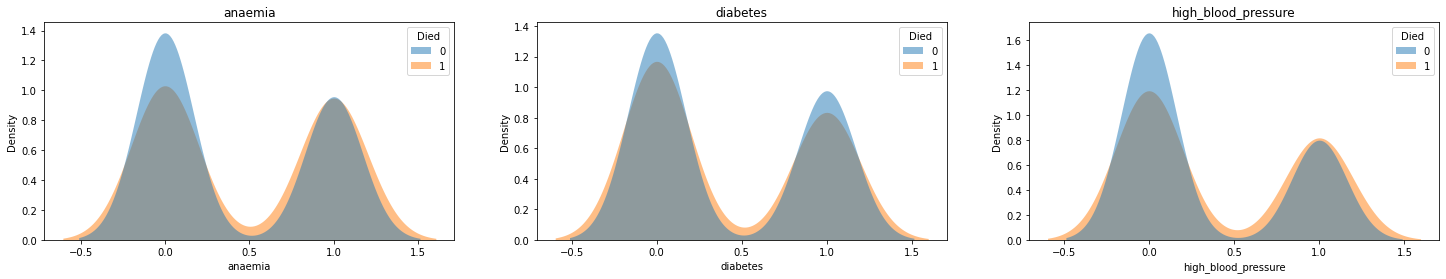

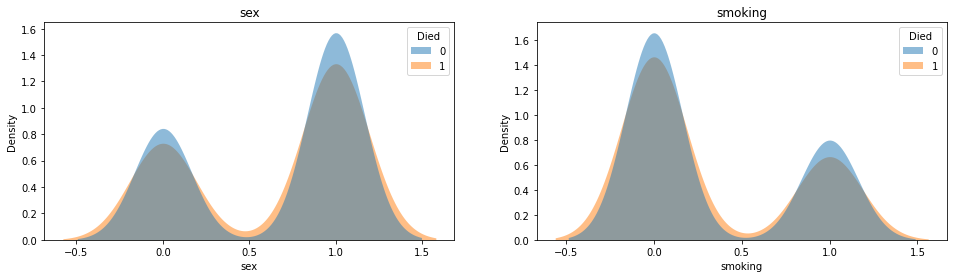

In [28]:
max_in_row = 3
counter = 0
for x in categorical_columns:
  data = dataframe1[x]
  plt.figure( counter//max_in_row, figsize = (25,4))
  plt.subplot(1, max_in_row, (counter)%max_in_row + 1)
  plt.title(x)
  sns.kdeplot(x=x,
              data = dataframe1,
              hue = 'Died', 
              fill = True, 
              common_norm = False, 
              alpha = 0.5, 
              linewidth = 0)
  counter += 1 

## Statistical Analysis

In [32]:
import statsmodels.api as sm
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import anderson
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

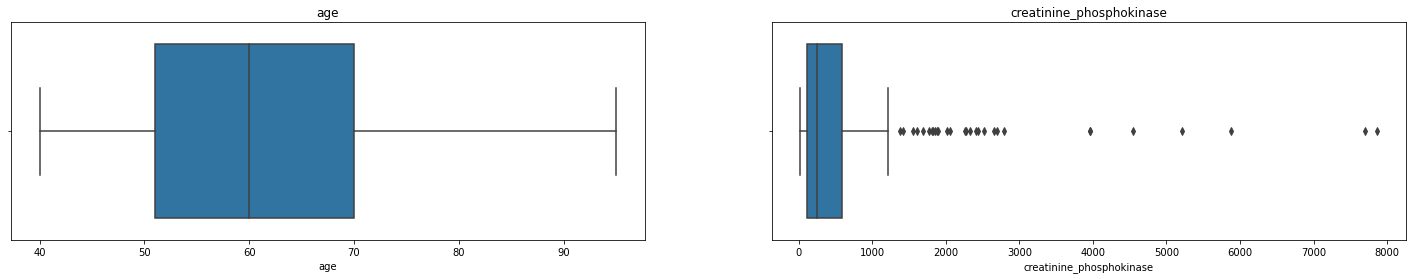

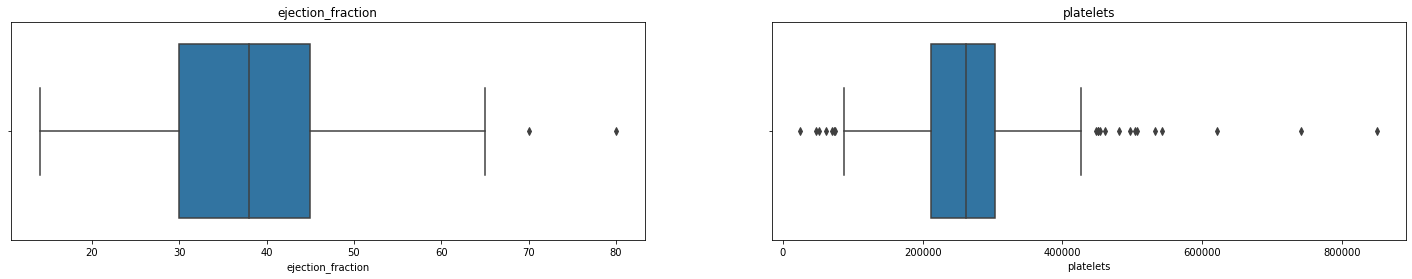

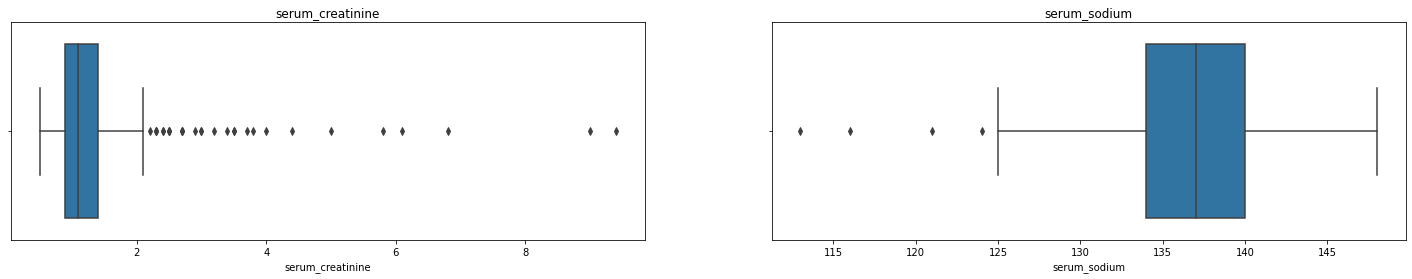

In [34]:
max_in_row = 2
counter = 0
for x in continous_columns:
  plt.figure(counter//max_in_row, figsize = (25,4))
  plt.subplot(1, max_in_row, (counter)%max_in_row + 1)
  plt.title(x)
  sns.boxplot(dataframe1[x], orient = 'v')
  counter += 1

In [35]:
dataframe1_no_outlier = dataframe1.copy()

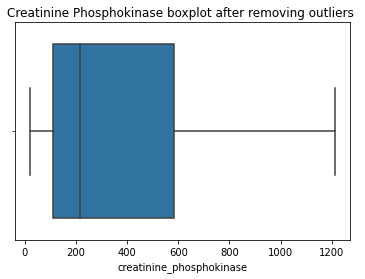

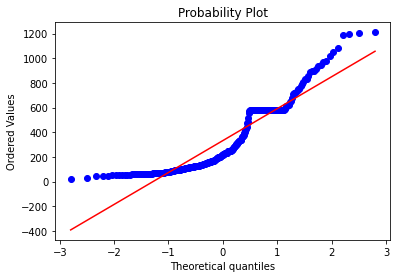

(0.9785878658294678, 0.0004392032278701663)

In [45]:
Q1 = dataframe1_no_outlier.creatinine_phosphokinase.quantile(0.25)
Q3 = dataframe1_no_outlier.creatinine_phosphokinase.quantile(0.75)
IQR = Q3 - Q1
filter = (dataframe1_no_outlier.creatinine_phosphokinase >= Q1 - 1.5*IQR ) & (dataframe1_no_outlier.creatinine_phosphokinase <= Q3 + 1.5*IQR)


sns.boxplot(dataframe1_no_outlier.loc[filter].creatinine_phosphokinase, orient = 'v')
plt.title('Creatinine Phosphokinase boxplot after removing outliers ')
shapiro(dataframe1_no_outlier.loc[filter].creatinine_phosphokinase)
fig = plt.figure()
res = stats.probplot(dataframe1_no_outlier.loc[filter].creatinine_phosphokinase, plot = plt)
plt.show()
dataframe1_no_outlier.creatinine_phosphokinase= dataframe1_no_outlier[filter]
shapiro(dataframe1_no_outlier.loc[filter].creatinine_phosphokinase)

### Creatinine Phosphokinase does not look normal and does not have a large enough p-value to go with null hypothesis that the data is normal

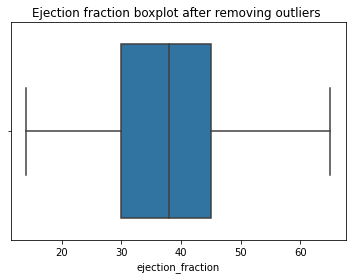

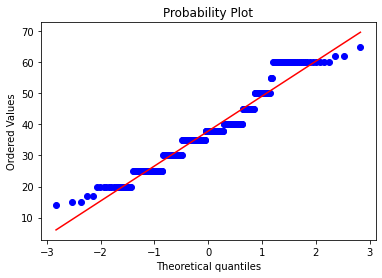

(0.9759414792060852, 6.853458762634546e-05)

In [50]:
Q1 = dataframe1_no_outlier.ejection_fraction.quantile(0.25)
Q3 = dataframe1_no_outlier.ejection_fraction.quantile(0.75) 
IQR = Q3 - Q1
filter = (dataframe1_no_outlier.ejection_fraction >= Q1 - 1.5*IQR) & (dataframe1_no_outlier.ejection_fraction <= Q3 + 1.5*IQR)

sns.boxplot(dataframe1_no_outlier.loc[filter].ejection_fraction, orient = 'v')
plt.title("Ejection fraction boxplot after removing outliers ")

fig = plt.figure()
res = stats.probplot(dataframe1.loc[filter].ejection_fraction, plot =plt)
plt.show()
dataframe1_no_outlier.ejection_fraction = dataframe1_no_outlier[filter]
shapiro(dataframe1_no_outlier.loc[filter].ejection_fraction)

### Ejection Fraction does not look normal and does not have a large enough p-value to go with null hypothesis that the data is normal

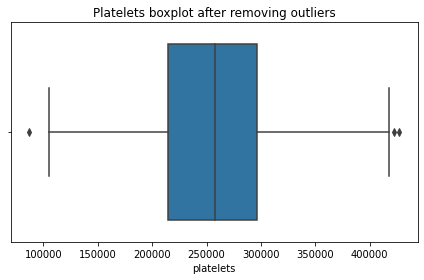

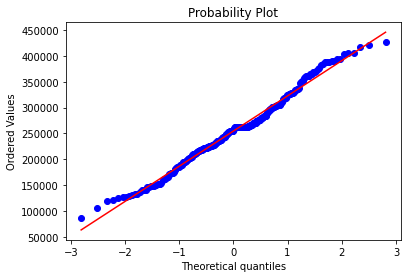

(0.9764506220817566, 0.00015053575043566525)

In [54]:
Q1 = dataframe1_no_outlier.platelets.quantile(0.25)
Q3 = dataframe1_no_outlier.platelets.quantile(0.75)
IQR = Q3-Q1

filter = (dataframe1_no_outlier.platelets >= Q1 - 1.5*IQR) & (dataframe1_no_outlier.platelets <= Q3 + 1.5*IQR)
sns.boxplot(dataframe1_no_outlier.loc[filter].platelets, orient = 'v')
plt.title("Platelets boxplot after removing outliers")
plt.tight_layout()

fig = plt.figure()
res = stats.probplot(dataframe1_no_outlier.loc[filter].platelets, plot = plt)
plt.show()

dataframe1_no_outlier.platelets = dataframe1_no_outlier[filter]
shapiro(dataframe1_no_outlier.loc[filter].platelets)

### Platelets does not look normal and does not have a large enough p-value to go with the null hypothesis that data is normal

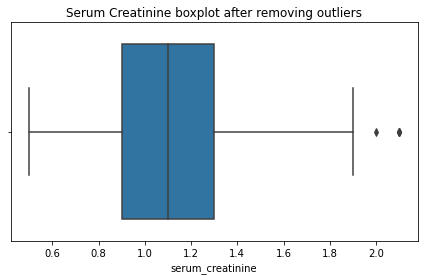

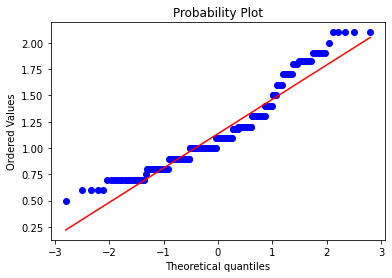

(0.9723266959190369, 4.320688094594516e-05)

In [55]:
Q1 = dataframe1_no_outlier.serum_creatinine.quantile(0.25)
Q3 = dataframe1_no_outlier.serum_creatinine.quantile(0.75)
IQR = Q3-Q1

filter = (dataframe1_no_outlier.serum_creatinine >= Q1 - 1.5*IQR) & (dataframe1_no_outlier.serum_creatinine <= Q3 + 1.5*IQR)
sns.boxplot(dataframe1_no_outlier.loc[filter].serum_creatinine, orient = 'v')
plt.title("Serum Creatinine boxplot after removing outliers")
plt.tight_layout()

fig = plt.figure()
res = stats.probplot(dataframe1_no_outlier.loc[filter].serum_creatinine, plot = plt)
plt.show()

dataframe1_no_outlier.serum_creatinine = dataframe1_no_outlier[filter]
shapiro(dataframe1_no_outlier.loc[filter].serum_creatinine)

### Serum Creatinine does not look normal and does not have a large enough p-value to go with the null hypothesis that data is normal

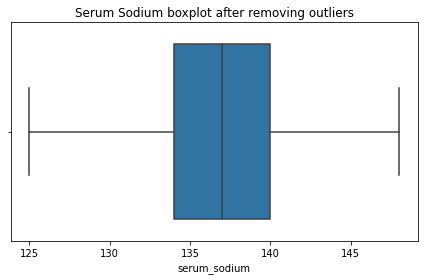

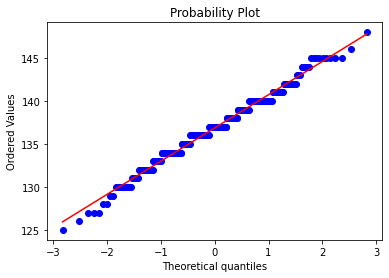

(0.9758960008621216, 7.160929089877754e-05)

In [56]:
Q1 = dataframe1_no_outlier.serum_sodium.quantile(0.25)
Q3 = dataframe1_no_outlier.serum_sodium.quantile(0.75)
IQR = Q3-Q1

filter = (dataframe1_no_outlier.serum_sodium >= Q1 - 1.5*IQR) & (dataframe1_no_outlier.serum_sodium <= Q3 + 1.5*IQR)
sns.boxplot(dataframe1_no_outlier.loc[filter].serum_sodium, orient = 'v')
plt.title("Serum Sodium boxplot after removing outliers")
plt.tight_layout()

fig = plt.figure()
res = stats.probplot(dataframe1_no_outlier.loc[filter].serum_sodium, plot = plt)
plt.show()

dataframe1_no_outlier.serum_sodium = dataframe1_no_outlier[filter]
shapiro(dataframe1_no_outlier.loc[filter].serum_sodium)

### Serum Sodium does not look normal and does not have a large enough p-value to go with the null hypothesis that data is normal

In [57]:
dataframe1_no_outlier = dataframe1_no_outlier.dropna()
dataframe1_no_outlier.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
Died                        0
dtype: int64

In [67]:
#_outlier = pd.get_dummies(dataframe1_no_outlier, columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], drop_first = False)
# 13 columns get converted to 18 columns
from sklearn.preprocessing import MinMaxScaler
y = dataframe1_no_outlier['Died']
X = dataframe1_no_outlier[dataframe1_no_outlier.columns.drop('Died')]
scalerX = MinMaxScaler(feature_range = (0,1))
X[X.columns] = scalerX.fit_transform(X[X.columns])


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

### Logistic Regression

In [74]:
model = LogisticRegression(max_iter = 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [75]:
mod = RFE(estimator = LogisticRegression(), n_features_to_select = len(X.columns), verbose = True)
mod.fit(X_train, y_train)
mod.score(X_test,y_test)

0.8

### DecisionTree 

In [78]:
model = RFE(estimator = DecisionTreeClassifier(), n_features_to_select=len(X.columns), verbose = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7333333333333333

### Random Forrest

In [79]:
model = RFE(estimator = RandomForestClassifier(), n_features_to_select = len(X.columns), verbose = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [80]:
model = RFE(estimator = KNeighborsClassifier(n_neighbors= 12), n_features_to_select = len(X.columns), verbose = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7555555555555555

### Support Vector Machine Accuracy


In [85]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_iter': [5,7,9,10,12,-1], 
    'degree' : [2,3,4,5,6], 
    'kernel' : ['poly', 'sigmoid', 'rbf', 'linear'],
    'gamma': ['scale', 'auto'],
}

grid_search_cv = GridSearchCV(estimator = SVC(),
                              param_grid = params, 
                              scoring = 'accuracy')
grid_search_cv.fit(X_train, y_train)
y_pred = grid_search_cv.predict(X_test)
print(grid_search_cv.best_estimator_)
accuracy_score(y_pred, y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


0.8666666666666667